<a href="https://colab.research.google.com/github/RajaAbitha/RajaAbitha/blob/main/Case_Study02new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA



In [ ]:
# Load Dataset
df = pd.read_csv('/content/Wholesale customers data.csv')
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [ ]:
# Drop non-numeric/categorical columns (optional)
X = df.drop(['Channel', 'Region'], axis=1)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

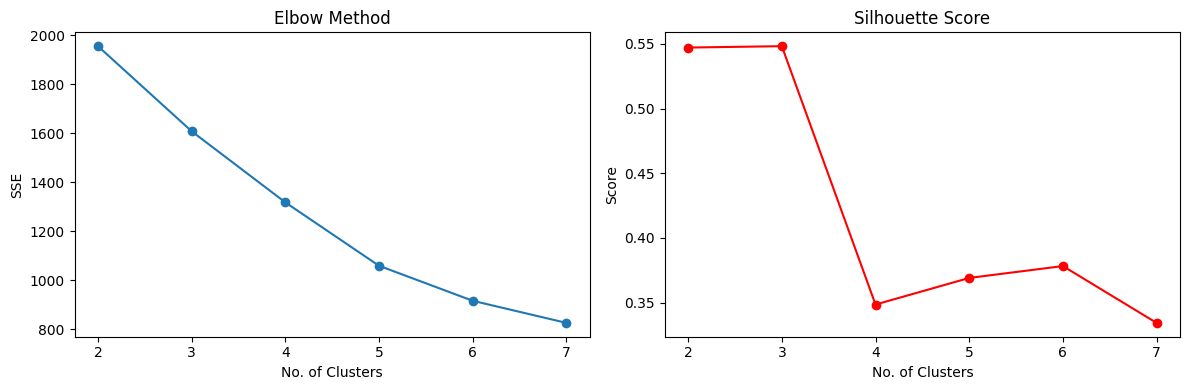

In [ ]:
# Elbow Method for KMeans
sse = []
silhouette = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(K_range, sse, marker='o')
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("SSE")

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette, marker='o', color='red')
plt.title("Silhouette Score")
plt.xlabel("No. of Clusters")
plt.ylabel("Score")

plt.tight_layout()
plt.show()


In [ ]:
# Apply KMeans
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
kmeans

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
df['Agglo_Cluster'] = agglo.fit_predict(X_scaled)
agglo

AgglomerativeClustering(n_clusters=3)

In [ ]:
# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

In [ ]:
dbscan

DBSCAN(eps=1.5)

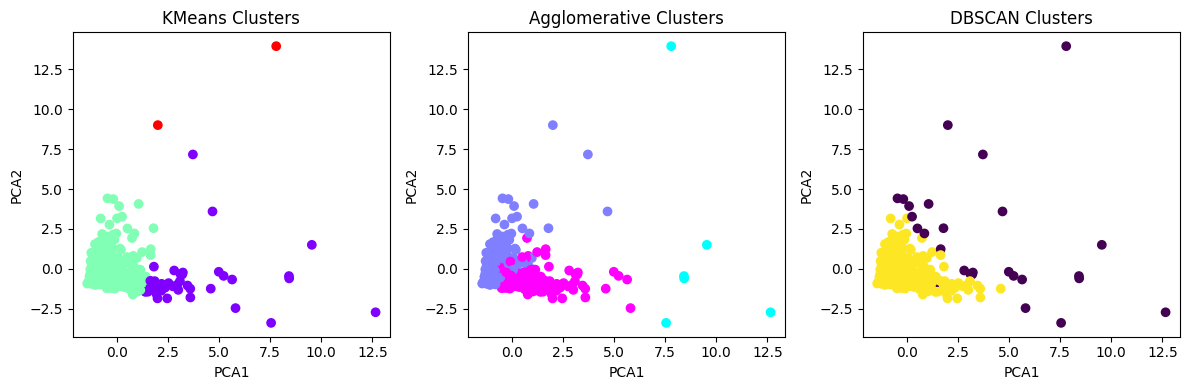

In [ ]:
# PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['KMeans_Cluster'], cmap='rainbow')
plt.title("KMeans Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Agglo_Cluster'], cmap='cool')
plt.title("Agglomerative Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['DBSCAN_Cluster'], cmap='viridis')
plt.title("DBSCAN Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")

plt.tight_layout()
plt.show()


